<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# Verificar cuántos valores faltantes hay en las columnas clave
missing_counts = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Valores faltantes por columna:")
print(missing_counts)

# Visualizar el porcentaje de valores faltantes
missing_percent = (missing_counts / len(df)) * 100
print("\nPorcentaje de valores faltantes:")
print(missing_percent)

# Estrategia: eliminar filas si el porcentaje de valores faltantes es bajo (<5%)
columns_to_check = ['Employment', 'JobSat', 'RemoteWork']
for col in columns_to_check:
    if missing_percent[col] < 5:
        df = df[df[col].notnull()]
    else:
        # Si el porcentaje es alto, rellenar con el valor más frecuente
        df[col].fillna(df[col].mode()[0], inplace=True)

# Confirmar que ya no hay valores faltantes
print("\nValores faltantes después del tratamiento:")
print(df[columns_to_check].isnull().sum())


Valores faltantes por columna:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Porcentaje de valores faltantes:
Employment     0.000000
JobSat        55.490013
RemoteWork    16.246160
dtype: float64

Valores faltantes después del tratamiento:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


/tmp/ipykernel_1464/3489171259.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_1464/2593603041.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df_filtered.groupby('RangoExperiencia')['JobSat'].apply(lambda x: x.mode()[0])
/tmp/ipykernel_1464/2593603041.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette='viridis')


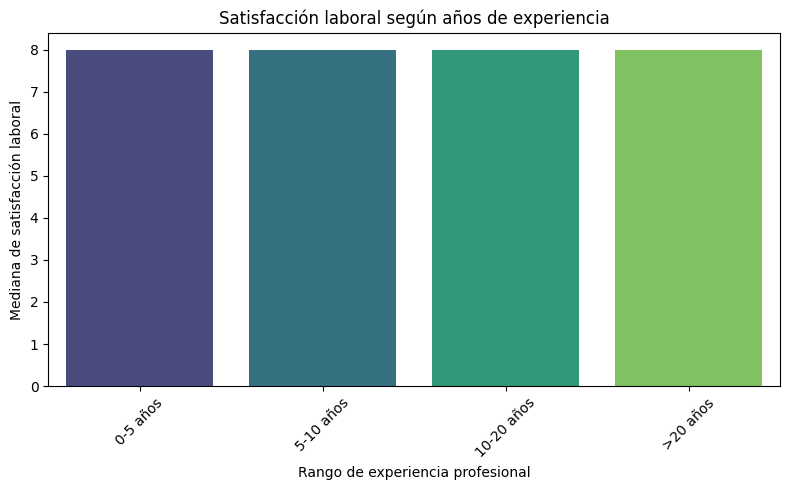

In [4]:
# Paso 1: Limpiar y convertir YearsCodePro a numérico
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Paso 2: Eliminar filas con valores faltantes en YearsCodePro o JobSat
df_filtered = df[['YearsCodePro', 'JobSat']].dropna()

# Paso 3: Definir rangos de experiencia
bins = [0, 5, 10, 20, 100]
labels = ['0-5 años', '5-10 años', '10-20 años', '>20 años']
df_filtered['RangoExperiencia'] = pd.cut(df_filtered['YearsCodePro'], bins=bins, labels=labels, right=False)

# Paso 4: Calcular la mediana de satisfacción laboral por rango
median_satisfaction = df_filtered.groupby('RangoExperiencia')['JobSat'].apply(lambda x: x.mode()[0])

# Paso 5: Visualizar con gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette='viridis')
plt.title('Satisfacción laboral según años de experiencia')
plt.xlabel('Rango de experiencia profesional')
plt.ylabel('Mediana de satisfacción laboral')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_1464/4286980521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_job_sat, order=df_job_sat.value_counts().index, palette='coolwarm')


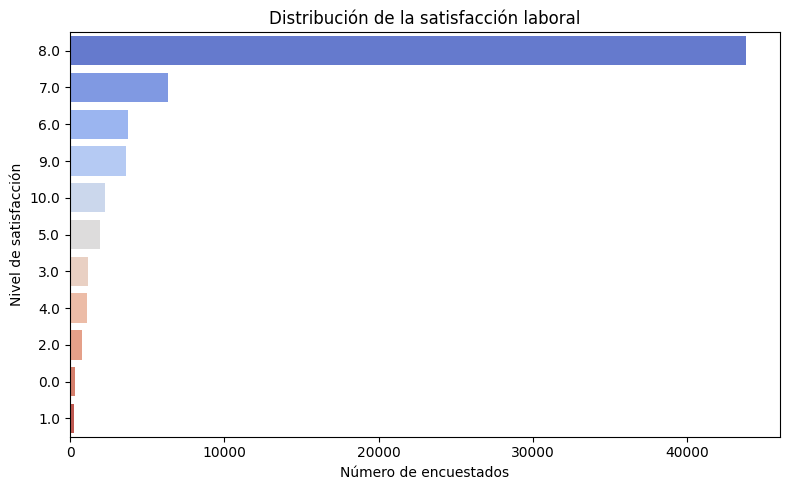

In [5]:
# Paso 1: Eliminar valores faltantes en JobSat
df_job_sat = df['JobSat'].dropna()

# Paso 2: Crear gráfico de conteo
plt.figure(figsize=(8, 5))
sns.countplot(y=df_job_sat, order=df_job_sat.value_counts().index, palette='coolwarm')
plt.title('Distribución de la satisfacción laboral')
plt.xlabel('Número de encuestados')
plt.ylabel('Nivel de satisfacción')
plt.tight_layout()
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_1464/1553138282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='RemoteWork', data=df_remote, order=df_remote['RemoteWork'].value_counts().index, palette='mako')


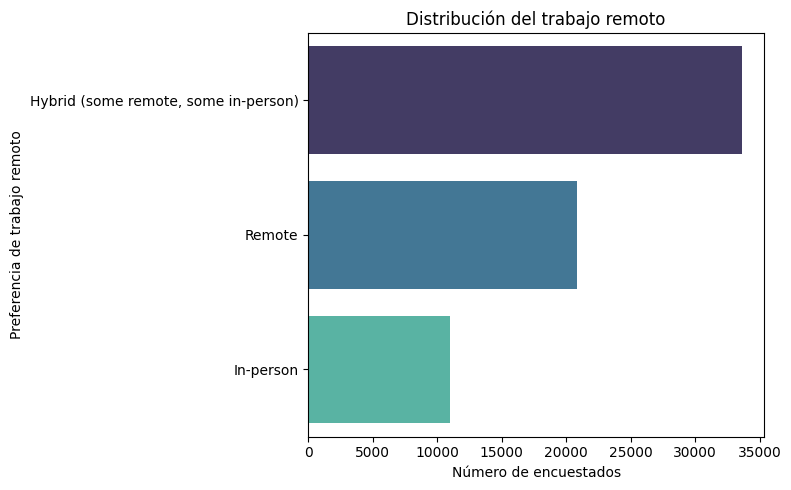


Preferencias de trabajo remoto según tipo de empleo:
Employment                            Employed, full-time  \
RemoteWork                                                  
Hybrid (some remote, some in-person)                17296   
In-person                                            8552   
Remote                                              13193   

Employment                            Employed, full-time;Employed, part-time  \
RemoteWork                                                                      
Hybrid (some remote, some in-person)                                       85   
In-person                                                                  32   
Remote                                                                     95   

Employment                            Employed, full-time;Independent contractor, freelancer, or self-employed  \
RemoteWork                                                                                                       
Hybrid

/tmp/ipykernel_1464/1553138282.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


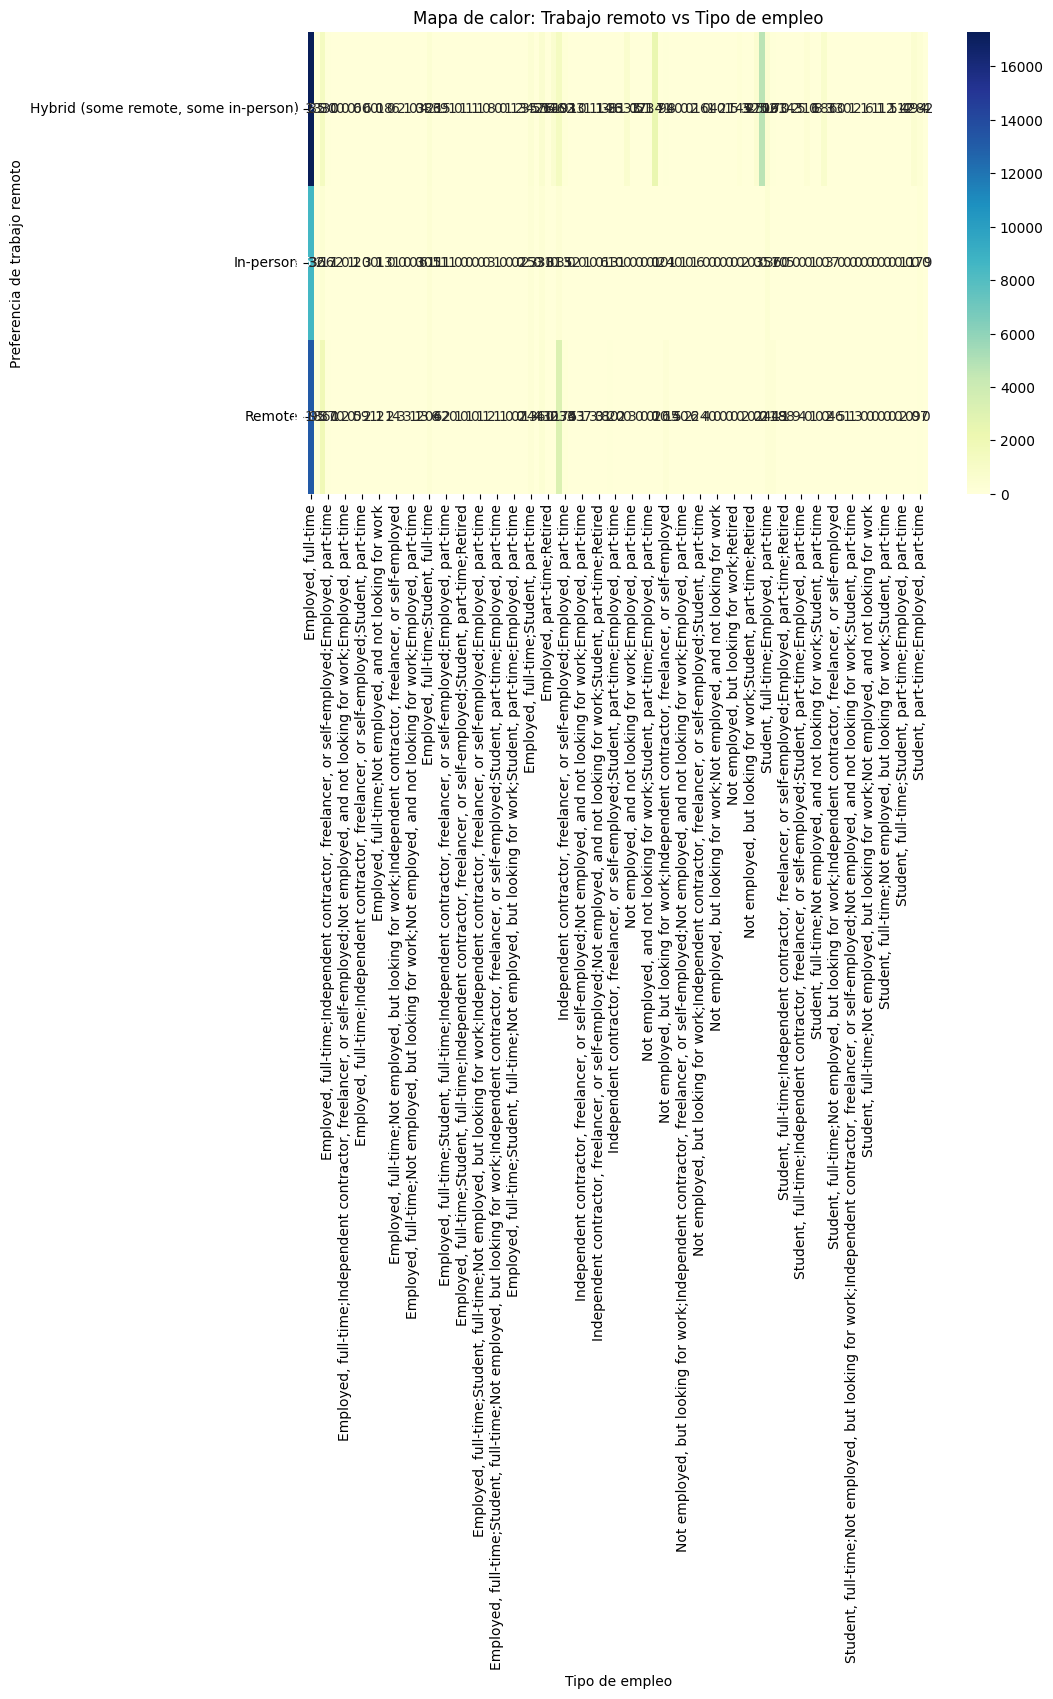

In [10]:
# Paso 1: Eliminar valores faltantes en RemoteWork y Employment
df_remote = df[['RemoteWork', 'Employment']].dropna()

# Paso 2: Gráfico de conteo para la distribución de trabajo remoto
plt.figure(figsize=(8, 5))
sns.countplot(y='RemoteWork', data=df_remote, order=df_remote['RemoteWork'].value_counts().index, palette='mako')
plt.title('Distribución del trabajo remoto')
plt.xlabel('Número de encuestados')
plt.ylabel('Preferencia de trabajo remoto')
plt.tight_layout()
plt.show()

# Paso 3: Tabulación cruzada entre RemoteWork y Employment
cross_tab = pd.crosstab(df['RemoteWork'], df['Employment'])
print("\nPreferencias de trabajo remoto según tipo de empleo:")
print(cross_tab)

# Paso 4: Visualización de la tabulación cruzada
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de calor: Trabajo remoto vs Tipo de empleo')
plt.xlabel('Tipo de empleo')
plt.ylabel('Preferencia de trabajo remoto')
plt.tight_layout()
plt.show()





#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


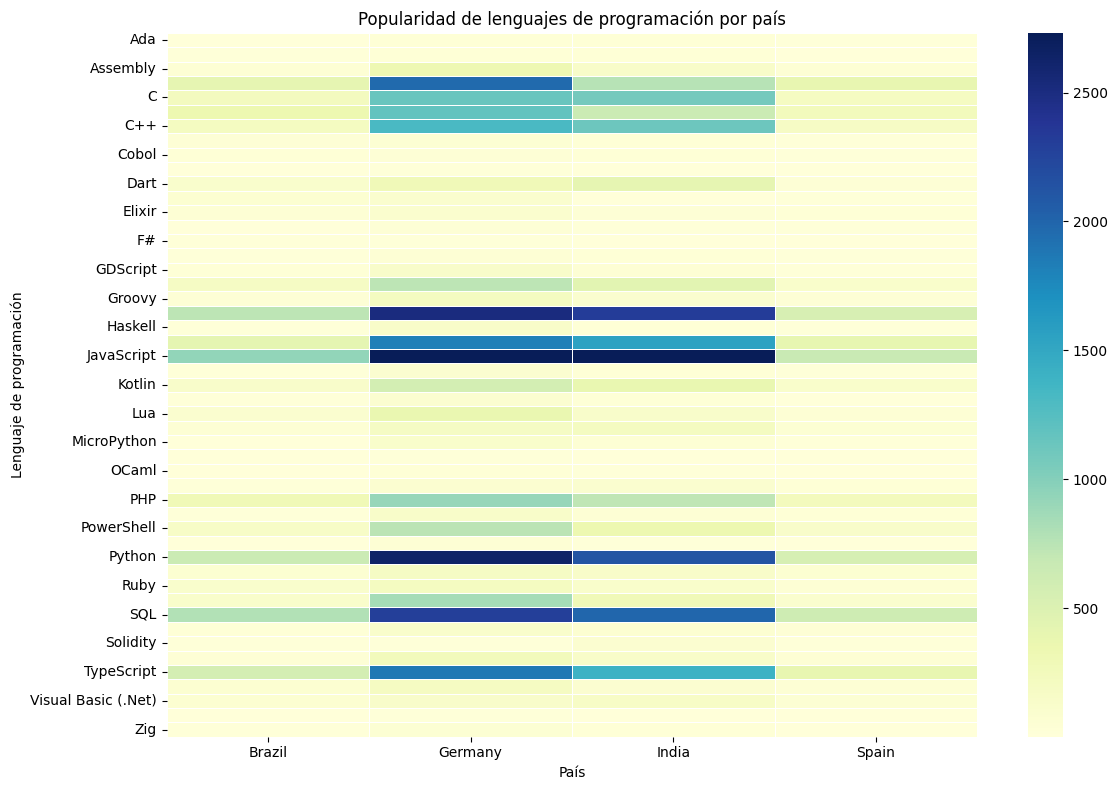

In [12]:
# Paso 1: Filtrar columnas relevantes y eliminar valores faltantes
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Paso 2: Separar los lenguajes en listas individuales
df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')

# Paso 3: Expandir las listas en filas individuales
df_exploded = df_lang.explode('LanguageList')

# Paso 4: Agrupar por país y lenguaje, y contar ocurrencias
language_counts = df_exploded.groupby(['Country', 'LanguageList']).size().reset_index(name='Count')

# Paso 5: Seleccionar países específicos (puedes ajustar esta lista)
paises = ['United States', 'India', 'Germany', 'Spain', 'Brazil']
language_filtered = language_counts[language_counts['Country'].isin(paises)]

# Paso 6: Crear tabla pivot para visualización
pivot_table = language_filtered.pivot(index='LanguageList', columns='Country', values='Count').fillna(0)

# Paso 7: Visualizar con mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Popularidad de lenguajes de programación por país')
plt.xlabel('País')
plt.ylabel('Lenguaje de programación')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


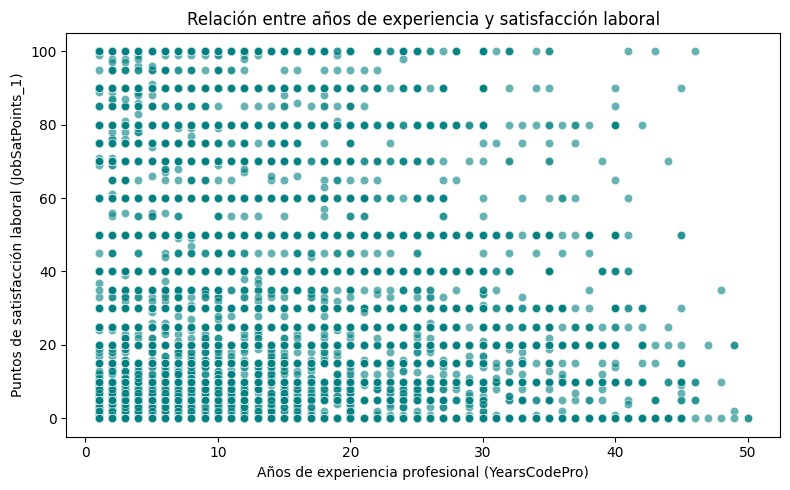

In [13]:
# Paso 1: Convertir YearsCodePro a numérico
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Paso 2: Eliminar valores faltantes en YearsCodePro y JobSatPoints_1
df_corr = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

# Paso 3: Crear gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_corr, x='YearsCodePro', y='JobSatPoints_1', alpha=0.6, color='teal')
plt.title('Relación entre años de experiencia y satisfacción laboral')
plt.xlabel('Años de experiencia profesional (YearsCodePro)')
plt.ylabel('Puntos de satisfacción laboral (JobSatPoints_1)')
plt.tight_layout()
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Distribución del tipo de empleo según nivel educativo:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Asso

/tmp/ipykernel_1464/1235012466.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


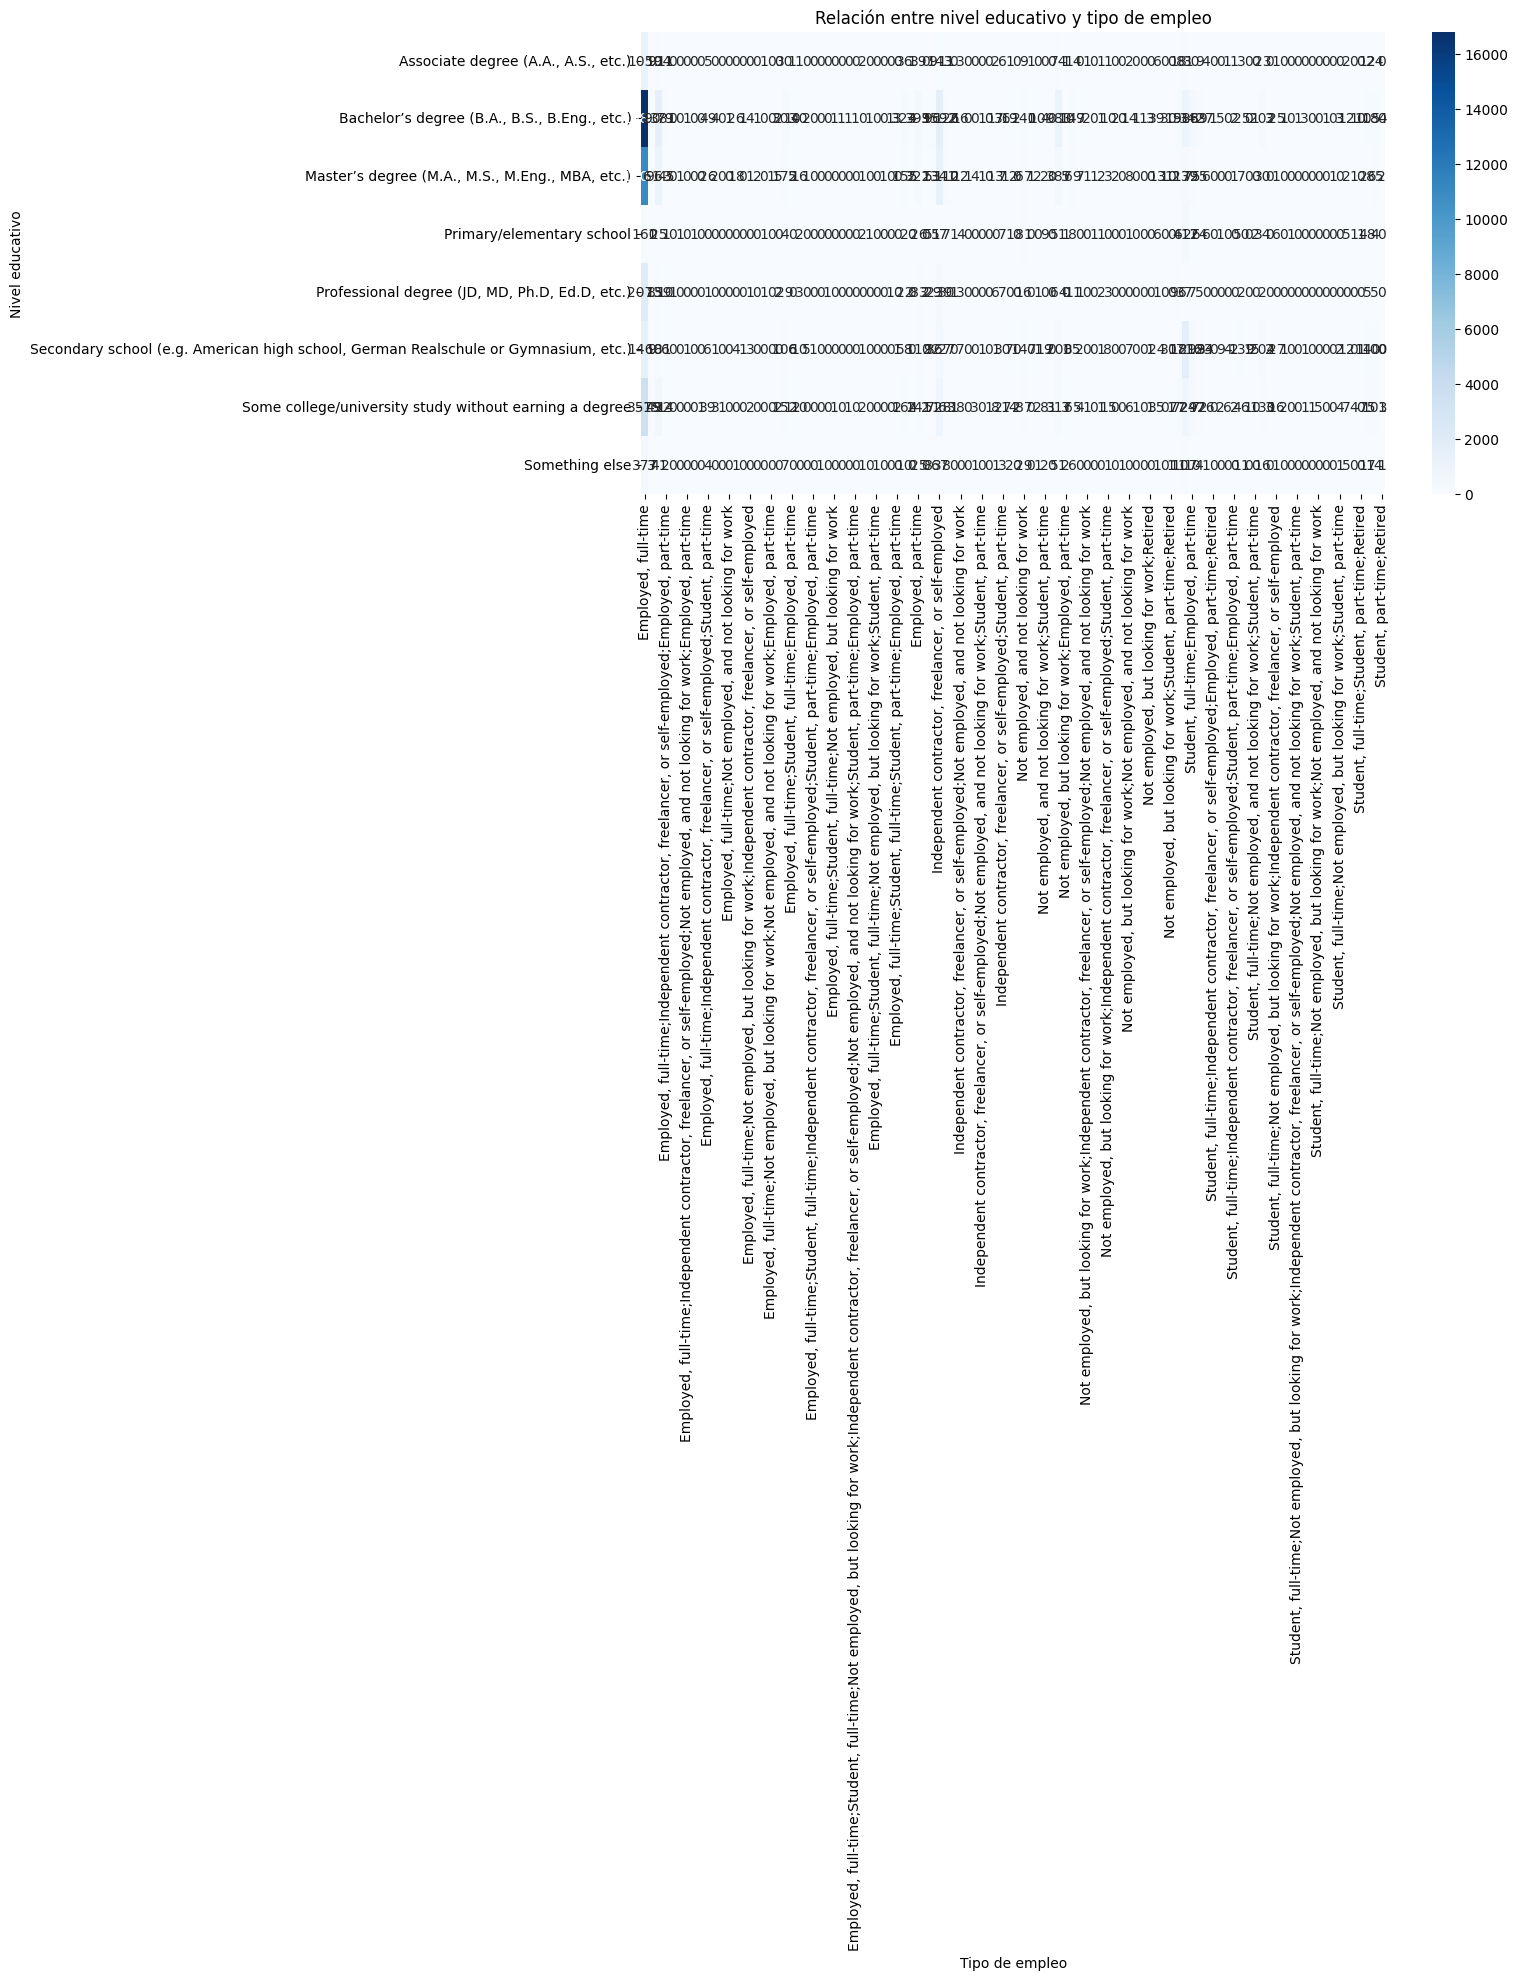

In [14]:
# Paso 1: Filtrar columnas relevantes y eliminar valores faltantes
df_edu = df[['EdLevel', 'Employment']].dropna()

# Paso 2: Tabulación cruzada entre nivel educativo y tipo de empleo
tabla_edu_empleo = pd.crosstab(df_edu['EdLevel'], df_edu['Employment'])

print("Distribución del tipo de empleo según nivel educativo:")
print(tabla_edu_empleo)

# Paso 3: Visualización con mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(tabla_edu_empleo, annot=True, fmt='d', cmap='Blues')
plt.title('Relación entre nivel educativo y tipo de empleo')
plt.xlabel('Tipo de empleo')
plt.ylabel('Nivel educativo')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [15]:
# Guardar el DataFrame limpio en un archivo CSV
df.to_csv('datos_limpios_analizados.csv', index=False)

# Confirmación
print("✅ El conjunto de datos ha sido guardado como 'datos_limpios_analizados.csv'")


✅ El conjunto de datos ha sido guardado como 'datos_limpios_analizados.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
